<a href="https://colab.research.google.com/github/Janya-Sharma-22/machine_learning/blob/main/EXP_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()

Saving exams.csv to exams (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('exams.csv')

print(df.head())
print("\nDescriptive Stats:\n", df.describe())

   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  

Descriptive Stats:
         math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      6

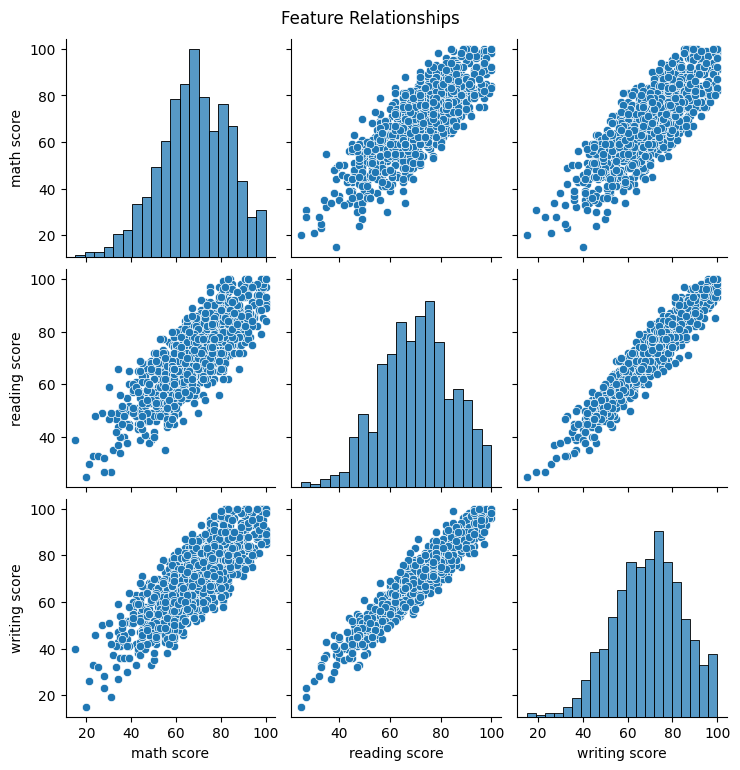

In [ ]:
sns.pairplot(df)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

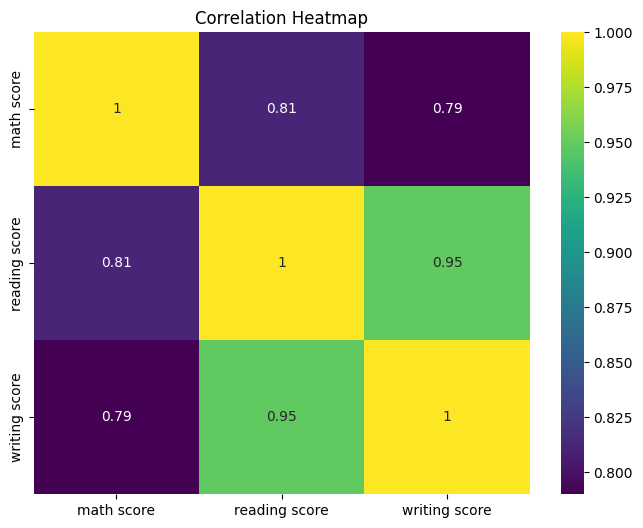

In [ ]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df[['test preparation course', 'math score', 'reading score', 'writing score']]
y = df['writing score']

X = pd.get_dummies(X, columns=['test preparation course'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("📉 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("📈 R² Score:", r2_score(y_test, y_pred))

📉 Mean Squared Error: 4.3595609066133995e-28
📈 R² Score: 1.0


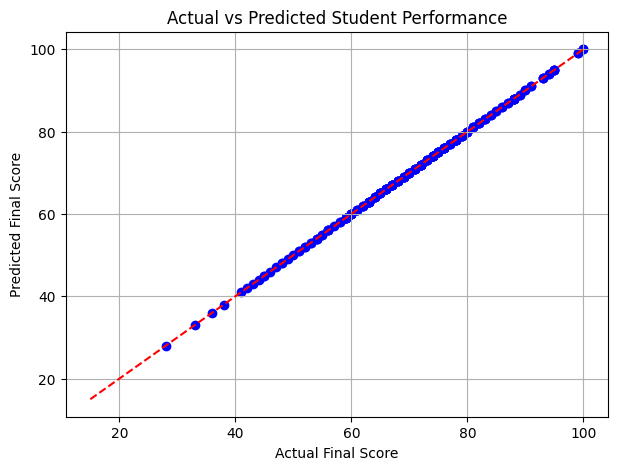

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Student Performance")
plt.grid(True)
plt.show()